In [1]:
import cv2
import os
import pyplot as plt

path = '/home/cvmlserver/Seohyeon/DAVANet/input/Test/'
left_list = sorted(os.listdir(path + '/image_left/'))
right_list = sorted(os.listdir(path + '/image_right/'))
length = len(right_list)
print(right_list)
print(left_list)
for i in range(length):
    # os.rename(path+'/image_left_blur_ga/'+ left_list[i], path+'/image_left_blur_ga/'+left_list[i].split('_')[0]+'_'+left_list[i].split('_')[-1],)
    # os.rename(path+'/image_right_blur_ga/'+right_list[i], path+'/image_right_blur_ga/'+right_list[i].split('_')[0]+'_'+right_list[i].split('_')[-1],)
     
    # stereo = cv2.StereoBM(1, 16, 15) 
    # stereo = cv2.createStereoBM(numDisparities=16, blockSize=15)
    imgL = cv2.imread(path+'/image_left/'+'disparity_right',0)
    imgR = cv2.imread(path+'/image_right/'+right_list[i],0)
    stereo = cv2.StereoBM_create(numDisparities = 16, blockSize = 15)
    disparity = stereo.compute(imgL, imgR)
                    
    cv2.imwrite(path+'/real_left/'+right_list[i], disparity)
    # cv2.imwrite(path+'/disparity_right/'+right_list[i], disparity)
# plt.imshow(disparity,'gray')
# plt.show()

ModuleNotFoundError: No module named 'pyplot'

In [ ]:
pathL = '/home/cvmlserver/Seohyeon/DAVANet/input/Test/image_left_blur_ga/'
pathR = '/home/cvmlserver/Seohyeon/DAVANet/input/Test/image_right_blur_ga/'
filelist = os.listdir('/home/cvmlserver/Seohyeon/DAVANet/input/Test/image_right_blur_ga/')

for i in range(len(filelist)):
    
    # imgL = cv2.imread('/home/cvmlserver/Seohyeon/DAVANet/input/Test/image_right_blur_ga/00'+str(i)+'.png',0)
    # imgR = cv2.imread('/home/cvmlserver/Seohyeon/DAVANet/input/Test/image_right/001.png',0)

    # stereo = cv2.StereoBM(1, 16, 15) 
    # stereo = cv2.createStereoBM(numDisparities=16, blockSize=15)
    # stereo = cv2.StereoBM_create(numDisparities = 16, blockSize = 15)
    # disparity = stereo.compute(imgL, imgR)
    cv2.imwrite('00'+str(i)+'.exr', disparity)

plt.imshow(disparity,'gray')
plt.show()


In [ ]:

for i in range(1,2):
    imgL = cv2.imread('/home/cvmlserver/Seohyeon/DAVANet/1666313493648_10x10.png',0)
    imgR = cv2.imread('/home/cvmlserver/Seohyeon/DAVANet/1666313493648_10x10.png',0)

    # imgL = cv2.imread('/home/cvmlserver/Seohyeon/DAVANet/input/Test/image_right_blur_ga/00'+str(i)+'.png',0)
    # imgR = cv2.imread('/home/cvmlserver/Seohyeon/DAVANet/input/Test/image_right/001.png',0)
    
    # stereo = cv2.StereoBM(1, 16, 15) 
    # stereo = cv2.createStereoBM(numDisparities=16, blockSize=15)
    stereo = cv2.StereoBM_create(numDisparities = 16, blockSize = 15)
    disparity = stereo.compute(imgL, imgR)
    # cv2.imwrite('00'+str(i)+'.exr', cv2.imgtogray(disparity))

plt.imshow(disparity,'gray')
plt.show()

os.listdir(path)

In [ ]:
import cv2
blur_dir = None # directory
image_idx = None # image file names under that directory
path = '/home/cvmlserver/Seohyeon/DAVANet/input/Test/'
left_list = sorted(os.listdir(path + 'image_left_blur_ga/'))
right_list = sorted(os.listdir(path + 'image_right_blur_ga/'))
length = len(left_list)
print(length)
print(right_list)
print(left_list)

for i in range(length):
        print(left_list[i])
        imgL = cv2.imread(path+'image_left_blur_ga/'+left_list[i])
        imgR = cv2.imread(path+'image_right_blur_ga/'+right_list[i])
        new_name = left_list[i].split('left')[0]+left_list[i].split('_')[-2]+'_'+left_list[i].split('_')[-1]
        print(new_name)
        cv2.imwrite(path+'image_left_blur_ga/'+new_name, imgL)
        cv2.imwrite(path+'image_right_blur_ga/'+new_name, imgR)

300


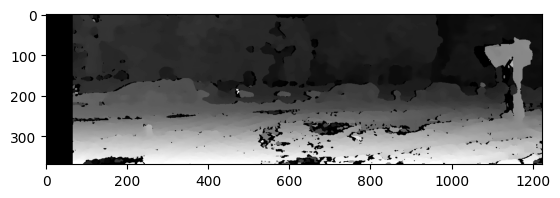

In [7]:
import cv2
import matplotlib.pyplot as plt

path = '/home/cvmlserver/Seohyeon/DAVANet/input/Train/'
left_list = sorted(os.listdir(path + 'image_left/'))
right_list = sorted(os.listdir(path + 'image_right/'))
length = len(left_list)
print(length)
print(right_list)
print(left_list)

for i in range(length):
    # imread: 0 = gray, 1 = color
    imgL = cv2.imread(path+'image_left/'+left_list[i], cv2.COLOR_BGR2GRAY)
    imgR = cv2.imread(path+'image_right/'+right_list[i], cv2.COLOR_BGR2GRAY)
    blockSize = 13
    uniquenessRatio = 5
    speckleRange = 3
    speckleWindow = 20
    num_disp = 64
    stereo = cv2.StereoSGBM_create(minDisparity = 2,
                        numDisparities = num_disp,
                        blockSize = blockSize,
                        uniquenessRatio = uniquenessRatio,
                        speckleWindowSize = speckleWindow,
                        speckleRange = speckleRange,
                        disp12MaxDiff = 1,
                        P1 = blockSize*blockSize*3,
                        P2 = 4*blockSize*blockSize*3)
    disparity = stereo.compute(imgL, imgR)
    # plt.imshow(disparity,'gray')
    # plt.show()
    cv2.imwrite(path+'disparity_left/'+left_list[i], disparity)
    cv2.imwrite(path+'disparity_right/'+right_list[i], disparity)